# Analyzing all Cameroon forest concessions raster data on tree height in 2000 and 2020

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [51]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
df00 = pd.read_csv('analysis/Cameroon concessions 2000 tree height raster data.csv')

In [3]:
df00.head()

,Value,Pixel count,Area (deg2)
0,0,2383412,0.148963
1,3,207465,0.012967
2,4,566999,0.035437
3,5,945580,0.059099
4,6,757703,0.047356


In [4]:
df00['Pixel count'].sum()

120665001

In [5]:
df20 = pd.read_csv('analysis/Cameroon concessions 2020 tree height raster data.csv')

In [6]:
df20.head()

,Value,Pixel count,Area (deg2)
0,0,2644983,0.165311
1,3,451498,0.028219
2,4,373212,0.023326
3,5,582191,0.036387
4,6,646191,0.040387


In [7]:
df20['Pixel count'].sum()

120665001

In [8]:
df00['Pixels_2000'] = df00['Pixel count']

In [9]:
df00 = df00.drop(columns='Pixel count')

In [10]:
df00['Area_2000'] = df00['Area (deg2)']

In [11]:
df00 = df00.drop(columns='Area (deg2)')

In [12]:
df00['Pixels_pct_2000'] = df00['Pixels_2000'] / 73549060

In [13]:
df00.head()

,Value,Pixels_2000,Area_2000,Pixels_pct_2000
0,0,2383412,0.148963,0.032406
1,3,207465,0.012967,0.002821
2,4,566999,0.035437,0.007709
3,5,945580,0.059099,0.012856
4,6,757703,0.047356,0.010302


In [14]:
df00.shape

(40, 4)

In [15]:
df20['Pixels_2020'] = df20['Pixel count']

In [16]:
df20 = df20.drop(columns='Pixel count')

In [17]:
df20['Area_2020'] = df20['Area (deg2)']

In [18]:
df20 = df20.drop(columns='Area (deg2)')

In [19]:
df20['Pixels_pct_2020'] = df20['Pixels_2020'] / 73549060

In [20]:
df20.head()

,Value,Pixels_2020,Area_2020,Pixels_pct_2020
0,0,2644983,0.165311,0.035962
1,3,451498,0.028219,0.006139
2,4,373212,0.023326,0.005074
3,5,582191,0.036387,0.007916
4,6,646191,0.040387,0.008786


In [21]:
df20.shape

(40, 4)

In [22]:
df = df00.merge(df20, on='Value', how='outer')

In [23]:
df.head()

,Value,Pixels_2000,Area_2000,Pixels_pct_2000,Pixels_2020,Area_2020,Pixels_pct_2020
0,0,2383412,0.148963,0.032406,2644983,0.165311,0.035962
1,3,207465,0.012967,0.002821,451498,0.028219,0.006139
2,4,566999,0.035437,0.007709,373212,0.023326,0.005074
3,5,945580,0.059099,0.012856,582191,0.036387,0.007916
4,6,757703,0.047356,0.010302,646191,0.040387,0.008786


In [24]:
df['Pixel_difference'] = df['Pixels_2020'] - df['Pixels_2000']

In [25]:
df['pct_difference'] = df['Pixels_pct_2020'] - df['Pixels_pct_2000']

In [26]:
df.head()

,Value,Pixels_2000,Area_2000,Pixels_pct_2000,Pixels_2020,Area_2020,Pixels_pct_2020,Pixel_difference,pct_difference
0,0,2383412,0.148963,0.032406,2644983,0.165311,0.035962,261571,0.003556
1,3,207465,0.012967,0.002821,451498,0.028219,0.006139,244033,0.003318
2,4,566999,0.035437,0.007709,373212,0.023326,0.005074,-193787,-0.002635
3,5,945580,0.059099,0.012856,582191,0.036387,0.007916,-363389,-0.004941
4,6,757703,0.047356,0.010302,646191,0.040387,0.008786,-111512,-0.001516


In [27]:
df.shape

(40, 9)

In [28]:
df.to_csv('cameroon_concessions_tree_height_raster_analysis_2000_2020.csv', index=False)

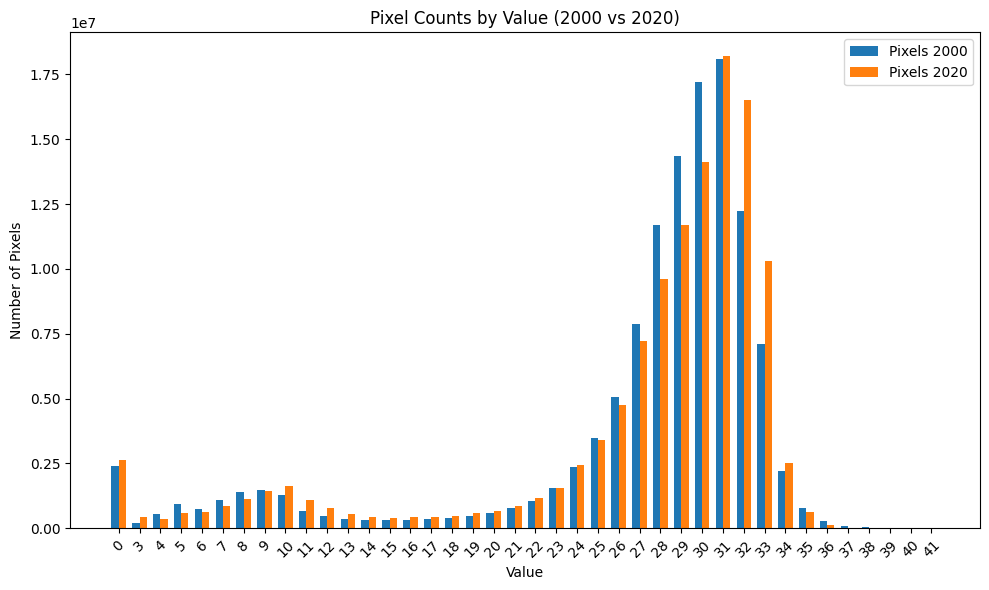

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Set the positions and width for the bars
x = np.arange(len(df['Value']))  # the label locations
width = 0.35  # width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, df['Pixels_2000'], width, label='Pixels 2000')
bars2 = ax.bar(x + width/2, df['Pixels_2020'], width, label='Pixels 2020')

# Add labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Number of Pixels')
ax.set_title('Pixel Counts by Value (2000 vs 2020)')
ax.set_xticks(x)
ax.set_xticklabels(df['Value'], rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

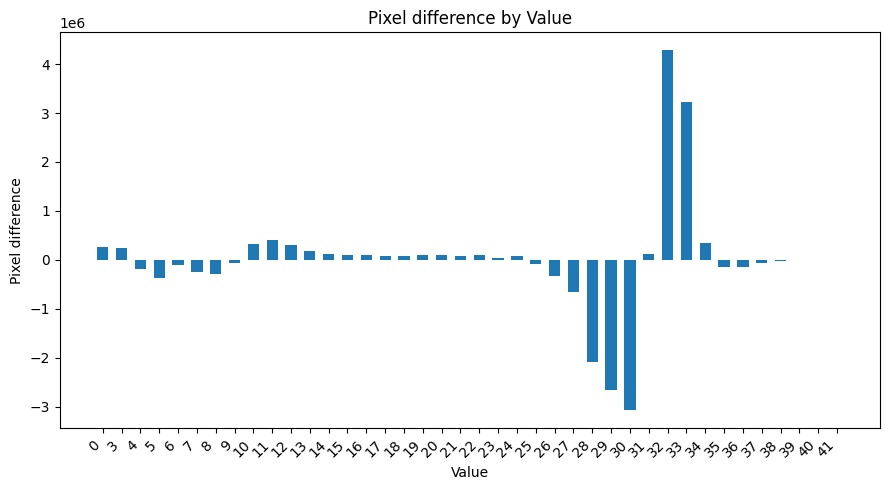

In [30]:
x = np.arange(len(df['Value']))        # one x‑tick per category
width = 0.6                            # bar width

fig, ax = plt.subplots(figsize=(9, 5))
ax.bar(x, df['Pixel_difference'], width)

# axis labels & ticks
ax.set_xlabel('Value')
ax.set_ylabel('Pixel difference')
ax.set_title('Pixel difference by Value')
ax.set_xticks(x)
ax.set_xticklabels(df['Value'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [70]:
# Create a copy of the DataFrame to avoid modifying the original
df_grouped = df.copy()

# Define custom group labels
def group_label(val):
    if val == 0:
        return '0'
    elif 1 <= val <= 10:
        return '1-10'
    elif 11 <= val <= 20:
        return '11-20'
    elif 21 <= val <= 30:
        return '21-30'
    elif 31 <= val <= 40:
        return '31-40'
    else:
        return 'other'  # in case there are values outside your expected range

# Apply grouping
df_grouped['Value_Group'] = df_grouped['Value'].apply(group_label)

# Group by the new category and sum the relevant columns
columns_to_sum = [
    'Pixels_2000', 'Area_2000', 'Pixels_pct_2000',
    'Pixels_2020', 'Area_2020', 'Pixels_pct_2020'
]

df_result = df_grouped.groupby('Value_Group')[columns_to_sum].sum().reset_index()
df_result

,Value_Group,Pixels_2000,Area_2000,Pixels_pct_2000,Pixels_2020,Area_2020,Pixels_pct_2020
0,0,2383412,0.148963,3.240574e-02,2644983,1.653114e-01,3.596216e-02
1,1-10,7772971,0.485811,1.056842e-01,7063355,4.414597e-01,9.603597e-02
2,11-20,4304621,0.269039,5.852721e-02,5857301,3.660813e-01,7.963801e-02
3,21-30,65443137,4.090196,8.897889e-01,56801768,3.550111e+00,7.722977e-01
4,31-40,40760809,2.547551,5.541989e-01,48297587,3.018599e+00,6.566717e-01
5,other,51,0.000003,6.934147e-07,7,4.380000e-07,9.517457e-08


In [71]:
df_result['pct_change'] = (df_result['Pixels_pct_2020'] - df_result['Pixels_pct_2000']) / df_result['Pixels_pct_2000'] 

In [72]:
df_result.head()

,Value_Group,Pixels_2000,Area_2000,Pixels_pct_2000,Pixels_2020,Area_2020,Pixels_pct_2020,pct_change
0,0,2383412,0.148963,0.032406,2644983,0.165311,0.035962,0.109746
1,1-10,7772971,0.485811,0.105684,7063355,0.441460,0.096036,-0.091293
2,11-20,4304621,0.269039,0.058527,5857301,0.366081,0.079638,0.360701
3,21-30,65443137,4.090196,0.889789,56801768,3.550111,0.772298,-0.132044
4,31-40,40760809,2.547551,0.554199,48297587,3.018599,0.656672,0.184903


# Same analysis for related concessions

In [34]:
rc00 = pd.read_csv('analysis/Cameroon former Wijma concessions 2000 tree height raster data.csv')

In [35]:
rc00['Pixel count'].sum()

4906301

In [36]:
rc20 = pd.read_csv('analysis/Cameroon former Wijma concessions 2020 tree height raster data.csv')

In [37]:
rc20['Pixel count'].sum()

4906301

In [38]:
rc00['Pixels_2000'] = rc00['Pixel count']

In [39]:
rc00 = rc00.drop(columns='Pixel count')

In [40]:
rc00['Area_2000'] = rc00['Area (deg2)']

In [41]:
rc00 = rc00.drop(columns='Area (deg2)')

In [42]:
rc00['Pixels_pct_2000'] = rc00['Pixels_2000'] / 5824148

In [43]:
rc00.head()

,Value,Pixels_2000,Area_2000,Pixels_pct_2000
0,0,15077,0.000942,0.002589
1,3,488,0.000030,0.000084
2,4,594,0.000037,0.000102
3,5,868,0.000054,0.000149
4,6,990,0.000062,0.000170


In [44]:
rc00.shape

(39, 4)

In [45]:
rc20['Pixels_2020'] = rc20['Pixel count']

In [46]:
rc20 = rc20.drop(columns='Pixel count')

In [47]:
rc20['Area_2020'] = rc20['Area (deg2)']

In [48]:
rc20.head()

,Value,Area (deg2),Pixels_2020,Area_2020
0,0,0.001415,22641,0.001415
1,3,0.000269,4307,0.000269
2,4,0.000255,4073,0.000255
3,5,0.000237,3787,0.000237
4,6,0.000245,3923,0.000245


In [50]:
rc20 = rc20.drop(columns={'Area (deg2)'})

In [51]:
rc20['Pixels_pct_2020'] = rc20['Pixels_2020'] / 5824130

In [52]:
rc20.head()

,Value,Pixels_2020,Area_2020,Pixels_pct_2020
0,0,22641,0.001415,0.003887
1,3,4307,0.000269,0.000740
2,4,4073,0.000255,0.000699
3,5,3787,0.000237,0.000650
4,6,3923,0.000245,0.000674


In [53]:
rc00.shape

(39, 4)

In [54]:
rc = rc00.merge(rc20, on='Value', how='outer')

In [55]:
rc.head()

,Value,Pixels_2000,Area_2000,Pixels_pct_2000,Pixels_2020,Area_2020,Pixels_pct_2020
0,0,15077,0.000942,0.002589,22641,0.001415,0.003887
1,3,488,0.000030,0.000084,4307,0.000269,0.000740
2,4,594,0.000037,0.000102,4073,0.000255,0.000699
3,5,868,0.000054,0.000149,3787,0.000237,0.000650
4,6,990,0.000062,0.000170,3923,0.000245,0.000674


In [56]:
avg_2000 = (df['Value'] * df['Pixels_2000']).sum() / df['Pixels_2000'].sum()

In [57]:
avg_2000

26.928644048161075

In [58]:
avg_2020 = (df['Value'] * df['Pixels_2020']).sum() / df['Pixels_2020'].sum()

In [59]:
avg_2020

27.012940546032898

In [60]:
rc['Pixel_difference'] = rc['Pixels_2020'] - rc['Pixels_2000']

In [61]:
rc.shape

(39, 8)

In [75]:
rc.to_csv('Wijma_former_concessions_tree_height_change_2000_2020.csv',index=False)

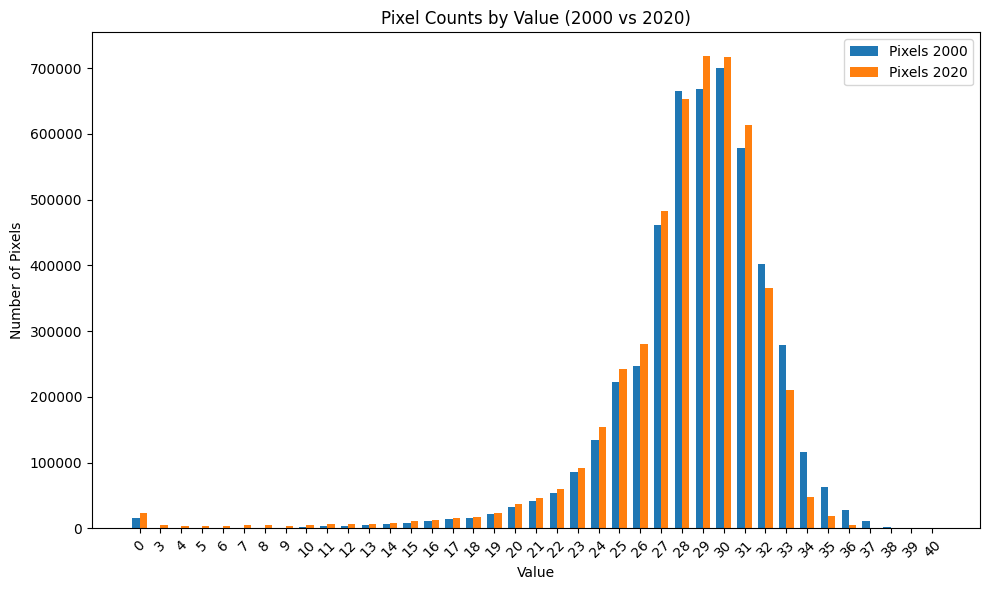

In [62]:
#Set the positions and width for the bars
x = np.arange(len(rc['Value']))  # the label locations
width = 0.35  # width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, rc['Pixels_2000'], width, label='Pixels 2000')
bars2 = ax.bar(x + width/2, rc['Pixels_2020'], width, label='Pixels 2020')

# Add labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Number of Pixels')
ax.set_title('Pixel Counts by Value (2000 vs 2020)')
ax.set_xticks(x)
ax.set_xticklabels(rc['Value'], rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

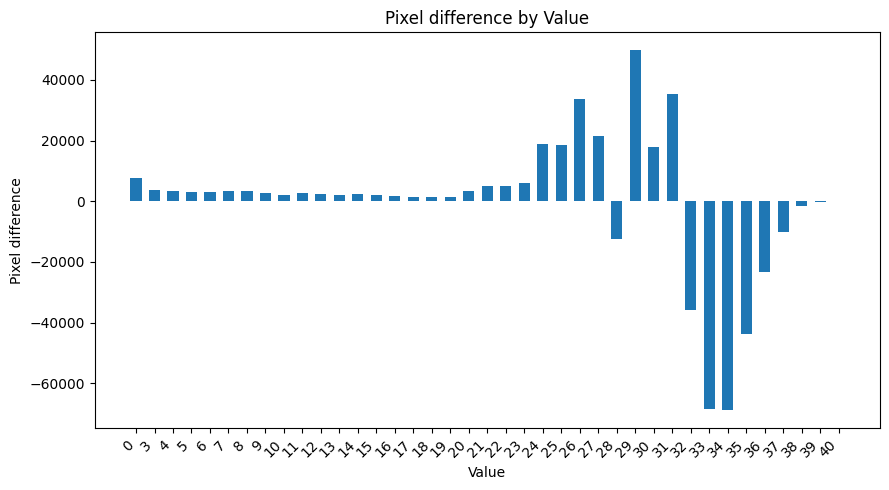

In [63]:
x = np.arange(len(rc['Value']))        # one x‑tick per category
width = 0.6                            # bar width

fig, ax = plt.subplots(figsize=(9, 5))
ax.bar(x, rc['Pixel_difference'], width)

# axis labels & ticks
ax.set_xlabel('Value')
ax.set_ylabel('Pixel difference')
ax.set_title('Pixel difference by Value')
ax.set_xticks(x)
ax.set_xticklabels(rc['Value'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [67]:
# Create a copy of the DataFrame to avoid modifying the original
rc_grouped = rc.copy()

# Define custom group labels
def group_label(val):
    if val == 0:
        return '0'
    elif 1 <= val <= 10:
        return '1-10'
    elif 11 <= val <= 20:
        return '11-20'
    elif 21 <= val <= 30:
        return '21-30'
    elif 31 <= val <= 40:
        return '31-40'
    else:
        return 'other'  # in case there are values outside your expected range

# Apply grouping
rc_grouped['Value_Group'] = rc_grouped['Value'].apply(group_label)

# Group by the new category and sum the relevant columns
columns_to_sum = [
    'Pixels_2000', 'Area_2000', 'Pixels_pct_2000',
    'Pixels_2020', 'Area_2020', 'Pixels_pct_2020'
]

rc_result = rc_grouped.groupby('Value_Group')[columns_to_sum].sum().reset_index()
rc_result

,Value_Group,Pixels_2000,Area_2000,Pixels_pct_2000,Pixels_2020,Area_2020,Pixels_pct_2020
0,0,15077,0.000942,0.002589,22641,0.001415,0.003887
1,1-10,8320,0.000520,0.001429,32829,0.002052,0.005637
2,11-20,122787,0.007674,0.021082,143681,0.008980,0.024670
3,21-30,3280463,0.205029,0.563252,3444650,0.215291,0.591445
4,31-40,1479654,0.092478,0.254055,1262500,0.078906,0.216771


In [68]:
rc_result['pct_change'] = (rc_result['Pixels_pct_2020'] - rc_result['Pixels_pct_2000']) / rc_result['Pixels_pct_2000'] 

In [69]:
rc_result

,Value_Group,Pixels_2000,Area_2000,Pixels_pct_2000,Pixels_2020,Area_2020,Pixels_pct_2020,pct_change
0,0,15077,0.000942,0.002589,22641,0.001415,0.003887,0.501696
1,1-10,8320,0.000520,0.001429,32829,0.002052,0.005637,2.945805
2,11-20,122787,0.007674,0.021082,143681,0.008980,0.024670,0.170168
3,21-30,3280463,0.205029,0.563252,3444650,0.215291,0.591445,0.050053
4,31-40,1479654,0.092478,0.254055,1262500,0.078906,0.216771,-0.146757


In [73]:
rc_result.to_csv('Wijma_former_concessions_tree_height_change.csv',index=False)

### Areas with the highest trees decreased by about 15% between 2000 and 2020 in Wijma's concessions

In [52]:
%%R

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [54]:
%%R
 
df <- read_csv('guyana_concessions_tree_height_raster_analysis_2000_2020.csv', show_col_types = FALSE)

In [55]:
%%R

head(df)

# A tibble: 6 × 7
  Value Pixels_2000 Area_2000 Pixels_pct_2000 Pixels_2020 Area_2020
  <dbl>       <dbl>     <dbl>           <dbl>       <dbl>     <dbl>
1     0     1333613   0.0834         0.0181       1723113   0.108  
2     3       26519   0.00166        0.000361       87226   0.00545
3     4      100486   0.00628        0.00137       122519   0.00766
4     5      345406   0.0216         0.00470       301924   0.0189 
5     6      164862   0.0103         0.00224       232080   0.0145 
6     7      139613   0.00873        0.00190       206965   0.0129 
# ℹ 1 more variable: Pixels_pct_2020 <dbl>


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


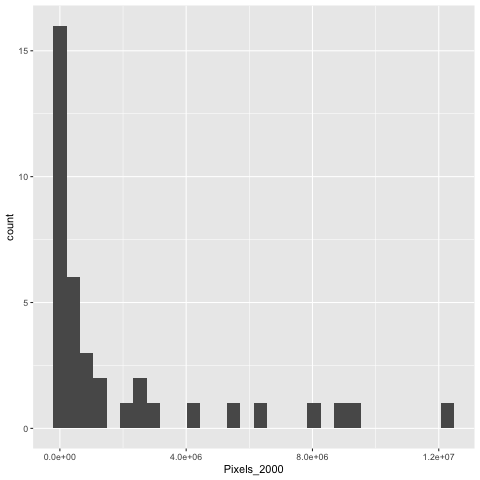

In [56]:
%%R

    ggplot(df) +
    aes(x=Pixels_2000) +
    geom_histogram()